<a href="https://colab.research.google.com/github/AmbaliAnjane/DataScientist-Analyst_projects/blob/main/weather_favourable_cropPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [67]:
dataset=pd.read_csv("/content/Crop_recommendation (1).csv")

In [68]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [69]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [70]:
dataset.shape

(2200, 8)

In [71]:
dataset.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

#as it is classification problem
1>split data independe and dependend variables
2>train_test_split 
3>standard scaler if algorithem supports
4>model prepration
5>prediction
6>accuracy measures
8>optimization and hyperparameter tunning
9>trying with differen different algorithms...

In [101]:
x=dataset.drop('label',axis=1).values
y=dataset['label'].values

In [103]:
z=y.reshape(-1)


In [106]:
# Label Encoding the  column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
#y=pd.DataFrame(y,columns=['label'])


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [108]:
from xgboost import XGBClassifier
classifier = XGBClassifier() 
classifier.fit(x_train, y_train)


XGBClassifier(objective='multi:softprob')

In [109]:
y_pred=classifier.predict(x_test)
y_pred

array([21, 21,  7,  3,  2, 20, 13,  9, 15,  1, 13,  5, 10, 14, 12,  0,  5,
       10,  5, 12,  4,  2,  9,  8,  6,  5, 10, 16, 13,  9, 19, 20, 11, 15,
        4,  6, 12, 12, 21, 13, 11,  2, 18, 21, 18, 14,  9,  9,  6, 14, 13,
        2,  0, 15, 18,  1, 17, 12, 10,  6, 16, 14, 21, 20, 15,  0,  7,  5,
        0, 16,  4, 19,  9, 11,  7, 13,  3, 11,  8, 12, 20,  2, 21, 21, 15,
        6, 11, 10, 13, 17,  2,  8, 14,  7, 14, 11,  5,  8, 10,  3, 16,  8,
       14,  1,  1, 20, 21,  5, 18, 15, 15, 12,  5,  7, 16, 19, 14, 10, 11,
        8, 19, 10, 16,  3,  3,  2, 19, 16,  3, 17, 13, 13, 15, 14, 11, 14,
        4, 19, 16,  2,  2,  7,  0,  5,  3,  0,  8, 12, 21, 17, 16,  4, 13,
        1, 19,  3, 21,  2,  0,  8, 10, 18,  8,  9,  9, 15, 20, 15,  1, 16,
       18,  0, 13,  4,  6, 14,  9, 19, 17, 16, 20, 17, 17, 18,  9,  1,  4,
       18, 20, 17, 11,  8, 13, 20, 11,  5, 18,  4,  3, 12,  4, 19, 11, 13,
       13, 16, 15, 11, 18,  1,  3,  2, 18, 16, 13, 14, 12, 17, 15, 19, 20,
       20,  2,  8,  2,  5

In [110]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

In [111]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9954545454545455

let's visualize accuracy with loc roc curve

In [112]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.92 %
Standard Deviation: 0.78 %


In [113]:
df=dataset['label'].unique()
df

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

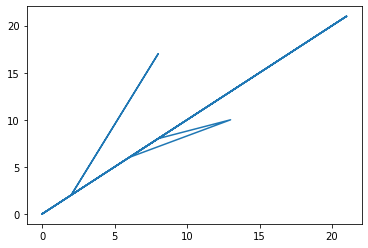

In [114]:
plt.plot(y_pred,y_test)

In [115]:
new_input=np.array([[60,45,40,20,70,6,203]])

In [116]:
columns=['N',	'P','K','temperature','humidity','ph','rainfall']

In [117]:
prediction_test=classifier.predict(new_input)
prediction_test

array([20])

In [118]:

list(le.classes_)
list(le.inverse_transform([prediction_test]))




/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['rice']

here i have passes user's input: nitrogen as 60,phosphorouse :45,potesiam as 40,temperature:20,humidity70,ph:6,rainfall:203 and our  model is predicting 
this weather conditions are favourable for rice crop....